In [ ]:
!pip install py_ecc
!pip install pycryptodome
!pip install eth_abi

In [13]:
from py_ecc.bn128 import G1, multiply
import matplotlib.pyplot as plt
from Crypto.Hash import keccak
from eth_abi import encode
import numpy as np
import json

Get Sorted Private Keys

In [8]:
privkeys = np.arange(1, 1001, 1)
pubkeys = [""] * 1000

for i in range(1, 1001):
  point = multiply(G1, i)
  encoded = encode(['uint256', 'uint256'], [int(point[0]), int(point[1])])
  hash = keccak.new(digest_bits=256)
  hash.update(encoded)
  pubkeys[i-1] = hash.hexdigest()

final = [x for _,x in sorted(zip(pubkeys,privkeys))]
print(final)

Plot Gas Cost

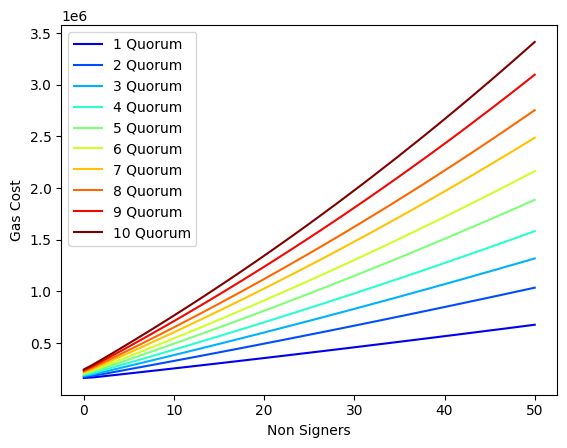

In [47]:
gas_data = open('gas_data.json')
data = json.load(gas_data)

colors = plt.cm.jet(np.linspace(0,1,11))

for qu in data:
  q = data[qu]
  res = q.items()
  lis = list(res)
  arr = np.array(lis, dtype=int)
  plt.plot(arr[:,1], color=colors[int(qu)], label=(qu + " Quorum"))

plt.xlabel("Non Signers")
plt.ylabel("Gas Cost")
plt.legend(loc="upper left")